In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bert-file/bert_train_test_data (2).pkl
/kaggle/input/input-file/bert_train_test_data (1).pkl


In [6]:
!pip install transformers

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [7]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers.schedules import CosineDecayRestarts

import requests, zipfile, os
import io
import gc
import psutil

import nltk

# Uncomment if not downloaded
# nltk.download('wordnet')
# !unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 126, 128)       │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 63, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 63, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 61, 64)         │        24,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1920)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        61,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │           660 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 381,812 (1.46 MB)

 Trainable params: 381,812 (1.46 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200


I0000 00:00:1731734863.459407     109 service.cc:145] XLA service 0x78fd68084c00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731734863.459473     109 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 21/472 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.0597 - loss: 3.2075  

I0000 00:00:1731734869.143929     109 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


472/472 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.0898 - loss: 2.9457 - val_accuracy: 0.3849 - val_loss: 2.0621
Epoch 2/200
472/472 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.3527 - loss: 2.0256 - val_accuracy: 0.5379 - val_loss: 1.4360
Epoch 3/200
472/472 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5125 - loss: 1.4885 - val_accuracy: 0.5581 - val_loss: 1.3828
Epoch 4/200
472/472 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5576 - loss: 1.3456 - val_accuracy: 0.6286 - val_loss: 1.1982
Epoch 5/200
472/472 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6452 - loss: 1.1187 - val_accuracy: 0.6427 - val_loss: 1.1502
Epoch 6/200
472/472 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6519 - loss: 1.0540 - val_accuracy: 0.6371 - val_loss: 1.1916
Epoch 7/200
472/472 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.6555 - loss: 1.0733 - val_accuracy: 0.6552 - val_loss: 1.1348
Epoch 8/200
472/472 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6967 - loss: 0.9361 - val_accurac

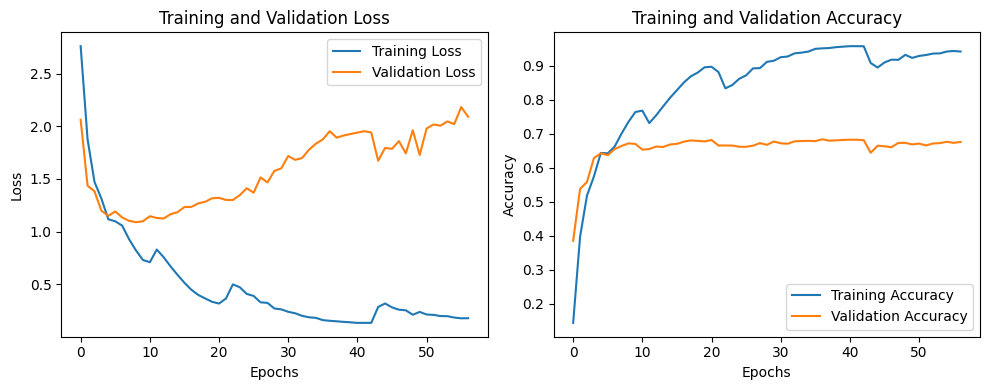

118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6785 - loss: 2.0373
Test Loss: 1.9538449048995972
Test Accuracy: 0.6840848922729492


In [8]:
import joblib
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import CosineDecayRestarts
from tensorflow.keras.callbacks import EarlyStopping

# Load preprocessed data
X_train, y_train, X_test, y_test = joblib.load('/kaggle/input/bert-file/bert_train_test_data (2).pkl')

# Get input shape and number of classes
max_sequence_length, embedding_dim = X_train.shape[1], X_train.shape[2]
num_classes = len(np.unique(y_train))

# Define the CNN model architecture
model = Sequential([
    Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(max_sequence_length, embedding_dim)),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),

    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),

    Flatten(),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])

# Cosine decay learning rate schedule
cosine_annealing = CosineDecayRestarts(
    initial_learning_rate=0.0005,
    first_decay_steps=20,
    t_mul=2,
    alpha=0.01
)
optimizer = Adam(learning_rate=cosine_annealing)

# Compile the model
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Early stopping callback
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=20,
    restore_best_weights=True
)

# Train the CNN model
history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
    verbose=1
)

# Plot training and validation metrics
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.tight_layout()
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")